<a href="https://colab.research.google.com/github/ar851060/Rice_Event/blob/main/RiceEvent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from toolz import partial
from scipy.optimize import fmin_slsqp

# NTUT

In [ ]:
df = pd.read_csv("/content/multiTimeline.csv").iloc[:-2,:]
df["date"] = pd.to_datetime(df["date"])
df["relative_date"] = (pd.to_datetime(df["date"]) - pd.to_datetime("2023-07-08")).dt.days
df["News"] = [0] * (df.shape[0]-4) + [13,41,93,137]
# df["News"] = [0] * (df.shape[0]-4) + [13,41-13,93-41,137-93]
df = df.reset_index().rename(columns = {"index":"day"})
df.head()

,day,date,NTUST,YunTech,NTUT,NTU,NTHU,relative_date,News
0,0,2023-06-14,7,1,4,61,15,-24,0
1,1,2023-06-15,9,3,7,61,14,-23,0
2,2,2023-06-16,7,3,4,52,12,-22,0
3,3,2023-06-17,4,1,3,44,14,-21,0
4,4,2023-06-18,5,2,3,49,16,-20,0


- NTUST: 台科大
- YunTech: 雲科大
- NTUT: 北科大
- NTU: 台大
- NTHU: 清大

根據 https://disp.cc/b/Gossiping/gh7r
白飯事件是在7/9開始

https://forum.gamer.com.tw/C.php?bsn=60076&snA=7804383&tnum=33

In [ ]:
fig = go.Figure()
cols = df.columns.values.tolist()
for i in cols[2:-2]:
    fig.add_trace(go.Scatter(x=df["date"], y=df[i],
                    mode='lines+markers', name = i))
fig.add_vline(x=pd.to_datetime("2023-07-08"), line_width=3, line_dash="dash", line_color="black")

fig.show()

## RKD

In [ ]:
rkd_df = df.assign(threshold=(df["date"] > pd.to_datetime("2023-07-08")).astype(int))
rkd_df

,day,date,NTUST,YunTech,NTUT,NTU,NTHU,relative_date,News,threshold
0,0,2023-06-14,7,1,4,61,15,-24,0,0
1,1,2023-06-15,9,3,7,61,14,-23,0,0
2,2,2023-06-16,7,3,4,52,12,-22,0,0
3,3,2023-06-17,4,1,3,44,14,-21,0,0
4,4,2023-06-18,5,2,3,49,16,-20,0,0
5,5,2023-06-19,6,2,4,89,15,-19,0,0
6,6,2023-06-20,6,2,4,72,15,-18,0,0
7,7,2023-06-21,6,2,4,55,13,-17,0,0
8,8,2023-06-22,4,2,2,40,9,-16,0,0
9,9,2023-06-23,3,2,3,49,13,-15,0,0


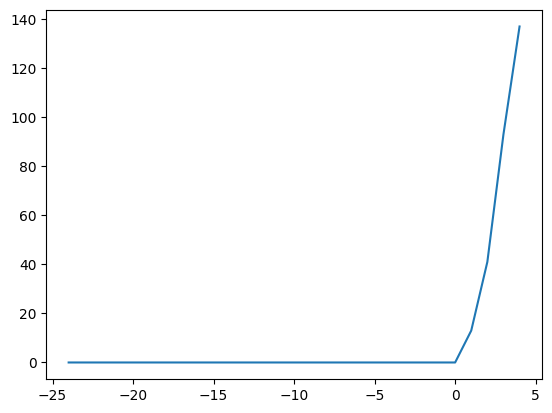

In [ ]:
plt.plot(rkd_df["relative_date"], rkd_df["News"])

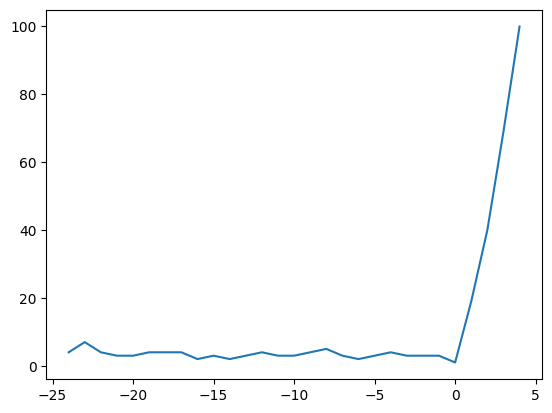

In [ ]:
plt.plot(rkd_df["relative_date"], rkd_df["NTUT"])

In [ ]:
model = smf.wls("News~relative_date+relative_date:threshold", rkd_df).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                   News   R-squared:                       0.968
Model:                            WLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     388.7
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           4.28e-20
Time:                        05:59:36   Log-Likelihood:                -90.253
No. Observations:                  29   AIC:                             186.5
Df Residuals:                      26   BIC:                             190.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
model = smf.wls("NTUT~relative_date+relative_date:threshold", rkd_df).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                   NTUT   R-squared:                       0.988
Model:                            WLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1075.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           1.02e-25
Time:                        05:59:36   Log-Likelihood:                -66.227
No. Observations:                  29   AIC:                             138.5
Df Residuals:                      26   BIC:                             142.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
print(23.2435/31.9946)

0.7264819688322405


In [ ]:
model = smf.wls("NTUT~relative_date+News", rkd_df).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                   NTUT   R-squared:                       0.991
Model:                            WLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1437.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           2.41e-27
Time:                        05:59:36   Log-Likelihood:                -62.055
No. Observations:                  29   AIC:                             130.1
Df Residuals:                      26   BIC:                             134.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.0396      0.767      5.264

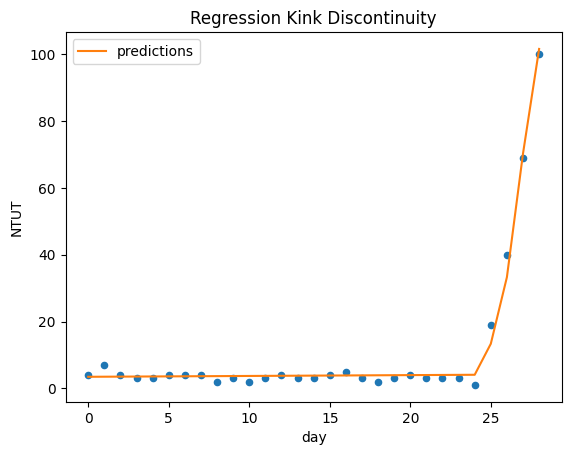

In [ ]:
ax = df.plot.scatter(x="day", y="NTUT", color="C0")
df.assign(predictions=model.fittedvalues).plot(x="day", y="predictions", ax=ax, color="C1")
plt.title(f"Regression Kink Discontinuity");

## DID

In [ ]:
did_df = pd.melt(rkd_df[["NTUT","YunTech","threshold","relative_date","News"]], id_vars = ["threshold","relative_date","News"])
did_df = did_df.assign(treatment=(did_df["variable"] == "NTUT").astype(int))
did_df

,threshold,relative_date,News,variable,value,treatment
0,0,-24,0,NTUT,4,1
1,0,-23,0,NTUT,7,1
2,0,-22,0,NTUT,4,1
3,0,-21,0,NTUT,3,1
4,0,-20,0,NTUT,3,1
5,0,-19,0,NTUT,4,1
6,0,-18,0,NTUT,4,1
7,0,-17,0,NTUT,4,1
8,0,-16,0,NTUT,2,1
9,0,-15,0,NTUT,3,1


In [ ]:
# did_df["relative_day"] = [x if x>0 else 0 for x in did_df["relative_date"]]
model = smf.wls("value~treatment*News", did_df).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.990
Model:                            WLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1874.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           1.54e-54
Time:                        05:59:36   Log-Likelihood:                -107.87
No. Observations:                  58   AIC:                             223.7
Df Residuals:                      54   BIC:                             232.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.3304      0.314      7.

<ipython-input-14-dc5bfe16a69a>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



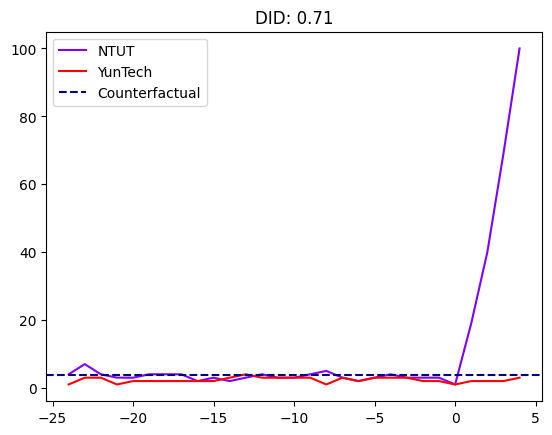

In [ ]:
x = did_df['relative_date'].unique()
ys = did_df['value']
labels = did_df['variable']
# Create a new figure
fig, ax = plt.subplots()

# Create unique list of labels
unique_labels = labels.unique()

# Create a color map
colors = plt.cm.get_cmap('rainbow', len(unique_labels))

# Loop over unique labels and plot each line separately
for i, label in enumerate(unique_labels):
    y = ys[labels == label]
    ax.plot(x, y, color=colors(i), label=label)

# Add a horizontal line
hline_value = model.params[0] + model.params[1]
ax.axhline(hline_value, color='navy', linestyle='--', label='Counterfactual')

# Add title
ax.set_title(f"DID: {round(model.params[3],2)}")

# Add legend
ax.legend()

# Show the plot
plt.show()

## Syntheic

In [ ]:
def loss_w(W, X, y) -> float:
    return np.sqrt(np.mean((y - X.dot(W))**2))



def get_w(X, y):

    w_start = [1/X.shape[1]]*X.shape[1]

    weights = fmin_slsqp(partial(loss_w, X=X, y=y),
                         np.array(w_start),
                         f_eqcons=lambda x: np.sum(x) - 1,
                         bounds=[(0.0, 1.0)]*len(w_start),
                         disp=False)
    return weights

In [ ]:
X = df[df["date"] < pd.to_datetime("2023-07-09")][["YunTech","NTU","NTHU"]].values
y = df[df["date"] < pd.to_datetime("2023-07-09")]["NTUT"].values
calif_weights = get_w(X, y)
print("Sum:", calif_weights.sum())
np.round(calif_weights, 4)

Sum: 1.0000000000006635


array([0.9787, 0.0213, 0.    ])

In [ ]:
calif_synth = df[["YunTech","NTU","NTHU"]].values.dot(calif_weights)
calif_synth

array([2.27504806, 4.23254646, 4.04128925, 1.91378444, 2.99878765,
       3.84881969, 3.48755607, 3.12629245, 2.80753044, 2.99878765,
       3.78627964, 4.82878124, 4.21129566, 4.19004486, 4.08379085,
       4.19004486, 2.16879405, 3.97753685, 2.91378444, 4.21129566,
       4.14754325, 4.04128925, 3.04128925, 2.99878765, 1.85003204,
       2.91378444, 3.31754966, 3.06254005, 4.19004486])

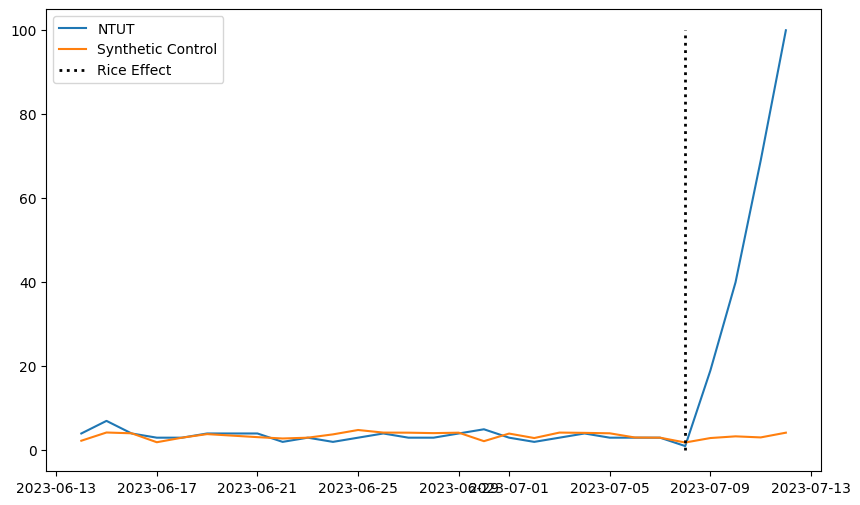

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df["date"], df["NTUT"].values , label="NTUT")
plt.plot(df["date"], calif_synth, label="Synthetic Control")
plt.vlines(x=pd.to_datetime("2023-07-08"), ymin = 0, ymax = 100, linestyle=":", lw=2, label="Rice Effect", color = "black")
plt.legend()

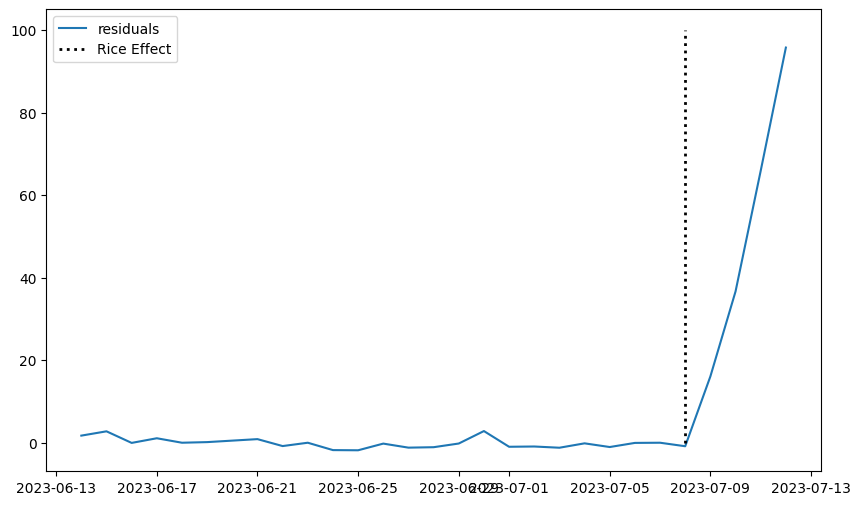

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df["date"], df["NTUT"].values - calif_synth , label="residuals")
plt.vlines(x=pd.to_datetime("2023-07-08"), ymin = 0, ymax = 100, linestyle=":", lw=2, label="Rice Effect", color = "black")
plt.legend()

In [ ]:
def test_statistic(u_hat, q=1, axis=0):
    return (np.abs(u_hat) ** q).mean(axis=axis) ** (1/q)

print(test_statistic(df["NTUT"].values - calif_synth))

8.165127735971646


In [ ]:
df["post_intervention"] = (df["relative_date"]>0)
df["residuals"] = df["NTUT"].values - calif_synth

In [ ]:
def p_value(resid_df, q=1):

    u = resid_df["residuals"].values
    post_intervention = resid_df["post_intervention"].values

    block_permutations = np.stack([np.roll(u, permutation, axis=0)[post_intervention]
                                   for permutation in range(len(u))])

    statistics = test_statistic(block_permutations, q=1, axis=1)

    p_val = np.mean(statistics >= statistics[0])

    return p_val
p_value(df)

0.034482758620689655

In [ ]:
def with_effect(df, state, null_hypothesis, start_at, window):
    window_mask = (df.index >= start_at) & (df.index < (start_at +window))

    y = np.where(window_mask, df[state] - null_hypothesis, df[state])

    return df.assign(**{state: y})

In [ ]:
df

,day,date,NTUST,YunTech,NTUT,NTU,NTHU,relative_date,News,post_intervention,residuals
0,0,2023-06-14,7,1,4,61,15,-24,0,False,1.724952
1,1,2023-06-15,9,3,7,61,14,-23,0,False,2.767454
2,2,2023-06-16,7,3,4,52,12,-22,0,False,-0.041289
3,3,2023-06-17,4,1,3,44,14,-21,0,False,1.086216
4,4,2023-06-18,5,2,3,49,16,-20,0,False,0.001212
5,5,2023-06-19,6,2,4,89,15,-19,0,False,0.151180
6,6,2023-06-20,6,2,4,72,15,-18,0,False,0.512444
7,7,2023-06-21,6,2,4,55,13,-17,0,False,0.873708
8,8,2023-06-22,4,2,2,40,9,-16,0,False,-0.807530
9,9,2023-06-23,3,2,3,49,13,-15,0,False,0.001212


In [ ]:
with_effect(df, "NTUT",0,24,5)

,day,date,NTUST,YunTech,NTUT,NTU,NTHU,relative_date,News,post_intervention,residuals
0,0,2023-06-14,7,1,4,61,15,-24,0,False,1.724952
1,1,2023-06-15,9,3,7,61,14,-23,0,False,2.767454
2,2,2023-06-16,7,3,4,52,12,-22,0,False,-0.041289
3,3,2023-06-17,4,1,3,44,14,-21,0,False,1.086216
4,4,2023-06-18,5,2,3,49,16,-20,0,False,0.001212
5,5,2023-06-19,6,2,4,89,15,-19,0,False,0.151180
6,6,2023-06-20,6,2,4,72,15,-18,0,False,0.512444
7,7,2023-06-21,6,2,4,55,13,-17,0,False,0.873708
8,8,2023-06-22,4,2,2,40,9,-16,0,False,-0.807530
9,9,2023-06-23,3,2,3,49,13,-15,0,False,0.001212


In [ ]:
def residuals(df, state, null, intervention_start, window, model):

    null_data = with_effect(df, state, null, intervention_start, window)

    model.fit(null_data.drop(columns=[state]), null_data[state])

    y0_est = pd.Series(model.predict(null_data.drop(columns=[state])), index=null_data.index)

    residuals = null_data[state] - y0_est

    test_mask = (null_data.index >= intervention_start) & (null_data.index < (intervention_start + window))

    return pd.DataFrame({
        "y0": null_data[state],
        "y0_est": y0_est,
        "residuals": residuals,
        "post_intervention": test_mask
    })[lambda d: d.index < (intervention_start + window)]

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import cvxpy as cp

class SyntheticControl(BaseEstimator, RegressorMixin):

    def __init__(self,):
        pass

    def fit(self, X, y):

        X, y = check_X_y(X, y)

        w = cp.Variable(X.shape[1])
        objective = cp.Minimize(cp.sum_squares(X@w - y))

        constraints = [cp.sum(w) == 1, w >= 0]

        problem = cp.Problem(objective, constraints)
        problem.solve(verbose=False)

        self.X_ = X
        self.y_ = y
        self.w_ = w.value

        self.is_fitted_ = True
        return self


    def predict(self, X):

        check_is_fitted(self)
        X = check_array(X)

        return X @ self.w_

In [ ]:
df_brave = df[["YunTech","NTU","NTHU","NTUT"]]
model = SyntheticControl()
residuals(df_brave,"NTUT",0,24,5, model)

,y0,y0_est,residuals,post_intervention
0,4,10.945439,-6.945439,False
1,7,12.613925,-5.613925,False
2,4,11.122109,-7.122109,False
3,3,8.127565,-5.127565,False
4,3,9.790594,-6.790594,False
5,4,16.420887,-12.420887,False
6,4,13.603013,-9.603013,False
7,4,10.785138,-6.785138,False
8,2,8.298778,-6.298778,False
9,3,9.790594,-6.790594,False


In [ ]:
def p_val_grid(df, state, nulls, intervention_start, period, model):

    df_aug = df[df.index < intervention_start].append(df.loc[period])

    p_vals =  {null: p_value(residuals(df_aug,
                                       state,
                                       null=null,
                                       intervention_start=period,
                                       window=1,
                                       model=model)) for null in nulls}

    return pd.DataFrame(p_vals, index=[period]).T
model = SyntheticControl()

nulls = np.linspace(-100, 100, 1000)

p_values_df = p_val_grid(
    df_brave,
    "NTUT",
    nulls=nulls,
    intervention_start=28,
    period=28,
    model=model
)

p_values_df

<ipython-input-76-c555a45ac1a9>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,28
-100.000000,0.034483
-99.799800,0.034483
-99.599600,0.034483
-99.399399,0.034483
-99.199199,0.034483
...,...
99.199199,0.172414
99.399399,0.172414
99.599600,0.172414
99.799800,0.172414


In [ ]:
def confidence_interval_from_p_values(p_values, alpha=0.1):
    big_p_values = p_values[p_values.values >= alpha]
    return pd.DataFrame({
        f"{int(100-alpha*100)}_ci_lower": big_p_values.index.min(),
        f"{int(100-alpha*100)}_ci_upper": big_p_values.index.max(),
    }, index=[p_values.columns[0]])

In [ ]:
confidence_interval_from_p_values(p_values_df)

,90_ci_lower,90_ci_upper
28,59.75976,100.0


In [ ]:
def compute_period_ci(df, state, nulls, intervention_start, period, model, alpha=0.1):
    p_vals = p_val_grid(df=df,
                        state=state,
                        nulls=nulls,
                        intervention_start=intervention_start,
                        period=period,
                        model=model)

    return confidence_interval_from_p_values(p_vals, alpha=alpha)


def confidence_interval(df, state, nulls, intervention_start, window, model, alpha=0.1, jobs=4):
    return pd.concat([compute_period_ci(df, state, nulls, intervention_start, period, model, alpha)
                     for period in range(intervention_start, intervention_start+window)])

In [ ]:
model = SyntheticControl()

nulls = np.linspace(-100, 100, 1000)

ci_df = confidence_interval(
    df_brave,
    "NTUT",
    nulls=nulls,
    intervention_start=24,
    window=28-24+1,
    model=model,
    alpha = 0.05
)

ci_df

<ipython-input-76-c555a45ac1a9>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-c555a45ac1a9>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-c555a45ac1a9>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-c555a45ac1a9>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-76-c555a45ac1a9>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,95_ci_lower,95_ci_upper
24,-3.503504,1.901902
25,13.313313,18.918919
26,33.933934,39.739740
27,63.163163,68.768769
28,92.992993,98.998999


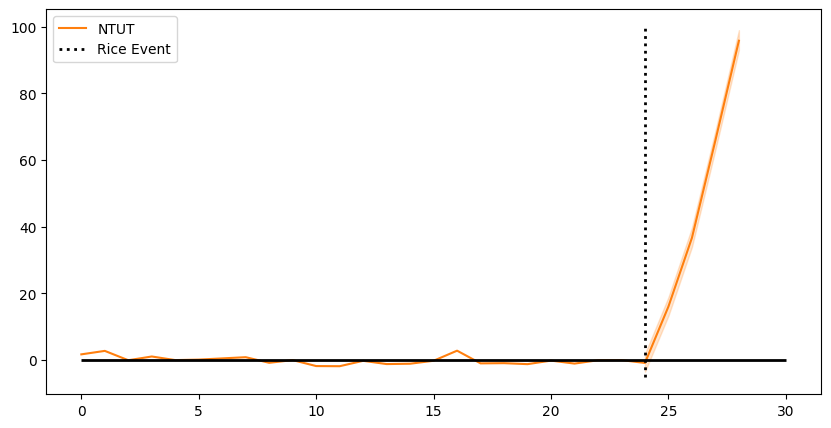

In [ ]:
plt.figure(figsize=(10,5))
plt.fill_between(ci_df.index, ci_df["95_ci_lower"], ci_df["95_ci_upper"], alpha=0.2,  color="C1")
plt.plot(df["NTUT"].index, df["residuals"], label="NTUT", color="C1")
plt.hlines(y=0, xmin=0, xmax=30, lw=2, color="Black")
plt.vlines(x=24, ymin=-5, ymax=100, linestyle=":", color="Black", lw=2, label="Rice Event")
plt.legend()

## SDID

In [ ]:
sdid_df = pd.DataFrame({'date':df["date"],"NTUT":df["NTUT"],"Syn":calif_synth,"relative_date":df["relative_date"], "News":df["News"]})
sdid_df = pd.melt(sdid_df, id_vars = ["date","relative_date","News"])
sdid_df = sdid_df.assign(treatment=(sdid_df["variable"] == "NTUT").astype(int)).assign(threshold=(sdid_df["date"] > pd.to_datetime("2023-07-08")).astype(int))
sdid_df

,date,relative_date,News,variable,value,treatment,threshold
0,2023-06-14,-24,0,NTUT,4.000000,1,0
1,2023-06-15,-23,0,NTUT,7.000000,1,0
2,2023-06-16,-22,0,NTUT,4.000000,1,0
3,2023-06-17,-21,0,NTUT,3.000000,1,0
4,2023-06-18,-20,0,NTUT,3.000000,1,0
5,2023-06-19,-19,0,NTUT,4.000000,1,0
6,2023-06-20,-18,0,NTUT,4.000000,1,0
7,2023-06-21,-17,0,NTUT,4.000000,1,0
8,2023-06-22,-16,0,NTUT,2.000000,1,0
9,2023-06-23,-15,0,NTUT,3.000000,1,0


In [ ]:
# sdid_df["relative_day"] = [x if x>0 else 0 for x in sdid_df["relative_date"]]
model = smf.wls("value~treatment*News", sdid_df).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.990
Model:                            WLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1831.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           2.86e-54
Time:                        06:05:47   Log-Likelihood:                -108.04
No. Observations:                  58   AIC:                             224.1
Df Residuals:                      54   BIC:                             232.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4230      0.315     10.

# NTUST

In [ ]:
df = pd.read_csv("/content/multiTimeline.csv")
df["date"] = pd.to_datetime(df["date"])
df["News"] = [0] * (df.shape[0]-6) + [13,41,93,137,166,167]
df["relative_date"] = (pd.to_datetime(df["date"]) - pd.to_datetime("2023-07-08")).dt.days
df = df.reset_index().rename(columns = {"index":"day"})
df.head()

,day,date,NTUST,YunTech,NTUT,NTU,NTHU,News,relative_date
0,0,2023-06-14,7,1,4,61,15,0,-24
1,1,2023-06-15,9,3,7,61,14,0,-23
2,2,2023-06-16,7,3,4,52,12,0,-22
3,3,2023-06-17,4,1,3,44,14,0,-21
4,4,2023-06-18,5,2,3,49,16,0,-20


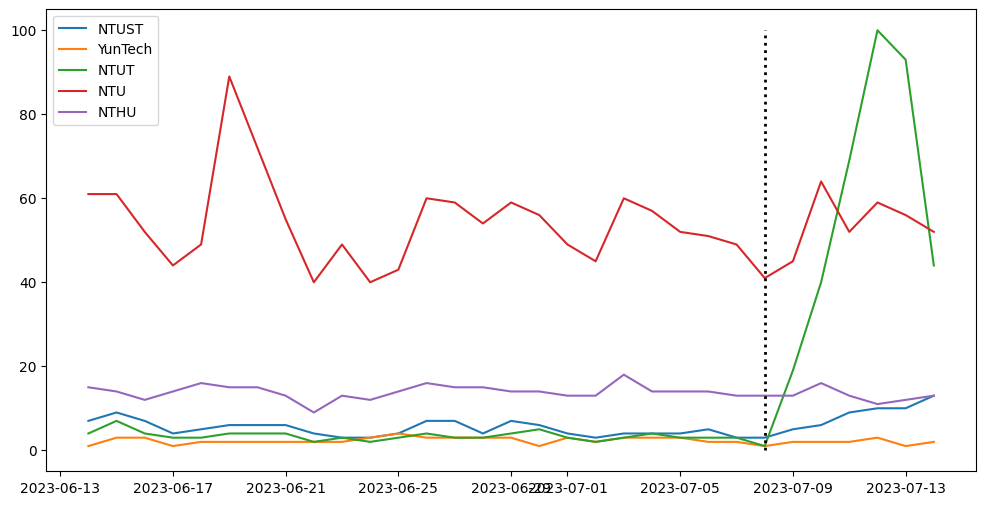

In [ ]:
plt.figure(figsize=(12,6))
cols = df.columns.values.tolist()
for i in cols[2:-2]:
    plt.plot(df["date"], df[i].values , label=i)
plt.vlines(x=pd.to_datetime("2023-07-08"), ymin = 0, ymax = 100, linestyle=":", lw=2, color = "black")
plt.legend()

## RKD

In [ ]:
rkd_df = df.assign(threshold=(df["date"] > pd.to_datetime("2023-07-08")).astype(int))
model = smf.wls("NTUST~day*threshold", rkd_df).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                  NTUST   R-squared:                       0.718
Model:                            WLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     22.94
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.37e-07
Time:                        06:05:48   Log-Likelihood:                -51.782
No. Observations:                  31   AIC:                             111.6
Df Residuals:                      27   BIC:                             117.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.4677      0.535     12.089

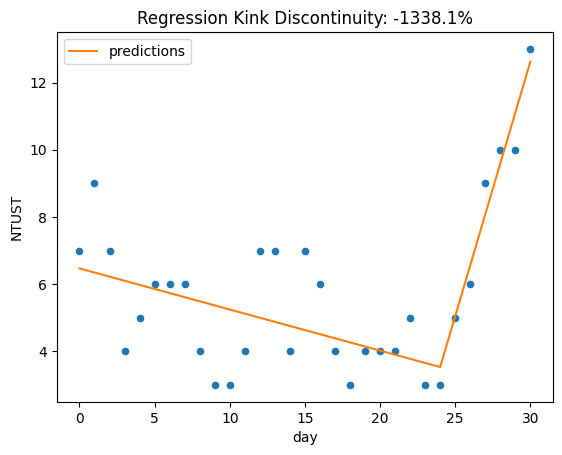

In [ ]:
ax = df.plot.scatter(x="day", y="NTUST", color="C0")
df.assign(predictions=model.fittedvalues).plot(x="day", y="predictions", ax=ax, color="C1")
ate_pct = 100*((model.params["day:threshold"] + model.params["day"])/model.params["day"] - 1)
plt.title(f"Regression Kink Discontinuity: {round(ate_pct,2)}%");

## DID

In [ ]:
did_df = pd.melt(rkd_df[["NTUST","YunTech","threshold","relative_date","News"]], id_vars = ["threshold","relative_date","News"])
did_df = did_df.assign(treatment=(did_df["variable"] == "NTUST").astype(int))
model = smf.wls("value~treatment*News", did_df).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.764
Model:                            WLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     62.45
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           3.70e-18
Time:                        06:06:01   Log-Likelihood:                -99.871
No. Observations:                  62   AIC:                             207.7
Df Residuals:                      58   BIC:                             216.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.3475      0.243      9.

<ipython-input-72-f0b68e88a831>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



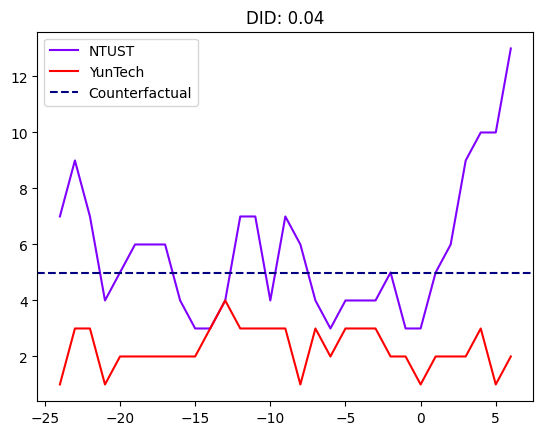

In [ ]:
x = did_df['relative_date'].unique()
ys = did_df['value']
labels = did_df['variable']
# Create a new figure
fig, ax = plt.subplots()

# Create unique list of labels
unique_labels = labels.unique()

# Create a color map
colors = plt.cm.get_cmap('rainbow', len(unique_labels))

# Loop over unique labels and plot each line separately
for i, label in enumerate(unique_labels):
    y = ys[labels == label]
    ax.plot(x, y, color=colors(i), label=label)

# Add a horizontal line
hline_value = model.params[0] + model.params[1] + model.params[2]
ax.axhline(hline_value, color='navy', linestyle='--', label='Counterfactual')

# Add title
ax.set_title(f"DID: {round(model.params[3],2)}")

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
did_df = pd.melt(rkd_df[["NTU","NTHU","threshold","relative_date"]], id_vars = ["threshold","relative_date"])
did_df = did_df.assign(treatment=(did_df["variable"] == "NTU").astype(int))
did_df["relative_day"] = [x if x>0 else 0 for x in did_df["relative_date"]]
model = smf.wls("value~treatment + relative_day + treatment:relative_day", did_df).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.885
Model:                            WLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     148.7
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           3.41e-27
Time:                        05:00:14   Log-Likelihood:                -212.07
No. Observations:                  62   AIC:                             432.1
Df Residuals:                      58   BIC:                             440.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 14

## Synthenic

In [ ]:
X = df[["YunTech","NTU","NTHU"]].values
y = df["NTUST"].values
calif_weights = get_w(X, y)
print("Sum:", calif_weights.sum())
np.round(calif_weights, 4)

Sum: 1.0


array([0.9316, 0.0684, 0.    ])

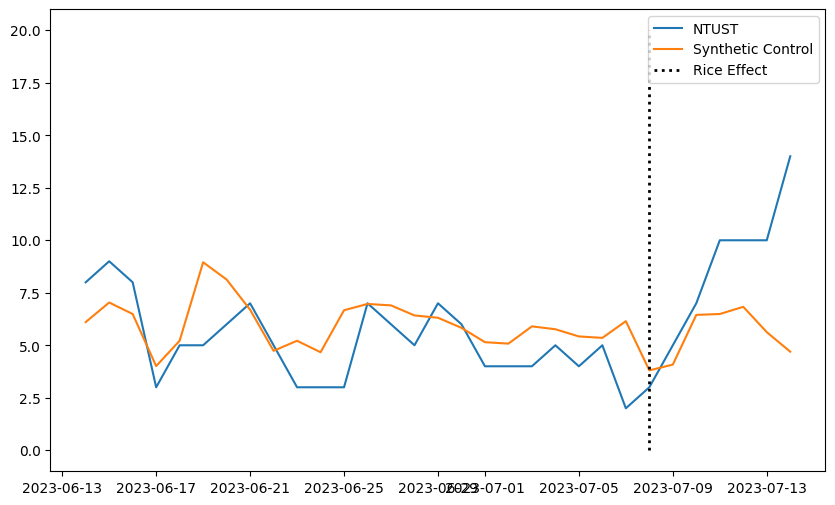

In [ ]:
calif_synth = df[["YunTech","NTU","NTHU"]].values.dot(calif_weights)
plt.figure(figsize=(10,6))
plt.plot(df["date"], df["NTUST"].values , label="NTUST")
plt.plot(df["date"], calif_synth, label="Synthetic Control")
plt.vlines(x=pd.to_datetime("2023-07-08"), ymin = 0, ymax = 20, linestyle=":", lw=2, label="Rice Effect", color = "black")
plt.legend()

## SDID

In [ ]:
sdid_df = pd.DataFrame({'date':df["date"],"NTUST":df["NTUST"],"Syn":calif_synth})
sdid_df = pd.melt(sdid_df, id_vars = ["date"])
sdid_df = sdid_df.assign(treatment=(sdid_df["variable"] == "NTUST").astype(int)).assign(threshold=(sdid_df["date"] > pd.to_datetime("2023-07-08")).astype(int))
sdid_df["relative_day"] = [x if x>0 else 0 for x in sdid_df["relative_date"]]
model = smf.wls("value~treatment + relative_day + treatment:relative_day", sdid_df).fit()
print(model.summary())

KeyError: ignored